In [2]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./MaxMarginal_BP.csv')
print(data)

                        Name  MODEL_MAP_FLAG  ATTRACTIVE_FIELD  DAMPING  \
0            fallen-haze-347            True              True    0.700   
1              neat-surf-377            True              True    0.990   
2    wandering-microwave-331            True              True    0.900   
3            swift-salad-405            True              True    0.990   
4              true-frog-285            True              True    0.900   
..                       ...             ...               ...      ...   
416            swift-sea-287            True             False    0.700   
417      wobbly-spaceship-44            True             False    0.100   
418          devout-dust-350            True             False    0.500   
419         sunny-cherry-232            True             False    0.700   
420         sweet-cherry-274            True             False    0.001   

     MAXITER UPDATES  ACC_VarState_training  L1_Prob_val  \
0      10000  SEQRND                 0.

In [22]:
def preprocess(array):
    if array.dtype == 'object':
        output = np.array([float(v) if v=='Infinity' else 1e99 for v in array])
        output[np.isinf(output)] = 1e99
        return output
    else:
        return array
def metric_correlations(values, metric_names, suffix='_val'):
    metric_names = [mn+suffix for mn in metric_names]
    metrics = [values[mn] for mn in metric_names]
    metrics = np.stack(metrics, axis=0)
    output = np.corrcoef(metrics)
    return np.tril(output, -1)
def plot_correlations(values, row_name, col_name, suffix='_val'):
    x, y = values[row_name+suffix], values[col_name+suffix]
    fig = plt.figure()
    plt.scatter(x, y)
    plt.xlabel(row_name)
    plt.ylabel(col_name)
    plt.show()
def metric_loss_correlations(values, metric_names, loss_names, suffix='_val'):
    metrics = [values[mn+suffix] for mn in metric_names]
    losses = [values[ln+suffix] for ln in loss_names]
    return np.array([[np.corrcoef(m,l)[1,0] for l in losses] for m in metrics])
def analyze_metrics(values, metric_names, loss_names, METRIC_PLOT_NUM, METRIC_LOSS_PLOT_NUM, suffix='_val'):
    # analyze metrics - training
    print('metric-correlations')
    metric_corr = metric_correlations(values, metric_names, suffix='_training')
    print(metric_corr.shape)
    row_indexes, col_indexes = np.nonzero(np.abs(metric_corr)>=(np.sort(np.abs(metric_corr).reshape(-1))[-METRIC_PLOT_NUM]))
    for row, col in zip(row_indexes.tolist(), col_indexes.tolist()):
        plot_correlations(values, metric_names[row], metric_names[col], suffix='_training')
    print()

    # analyze losses and metrics - training
    print('metric-loss-correlations')
    metric_loss_corr = metric_loss_correlations(values, metric_names, loss_names, suffix='_training')
    print(metric_loss_corr.shape)
    for li, lname in enumerate(loss_names):
        cur_corr = np.abs(metric_loss_corr[:,li]).reshape(-1)
        for idx in np.nonzero(cur_corr>=(np.sort(cur_corr)[-METRIC_LOSS_PLOT_NUM]))[0]:
            plot_correlations(values, lname, metric_names[idx], suffix='_training')

metric-correlations
(5, 5)


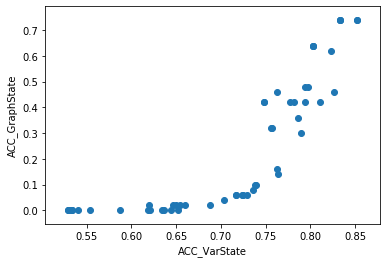

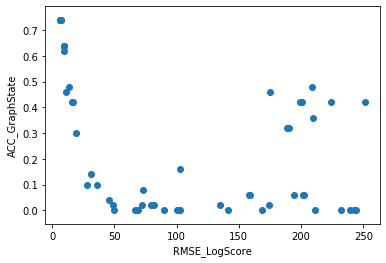

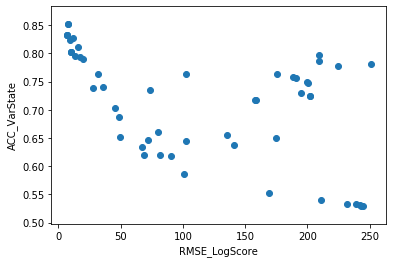

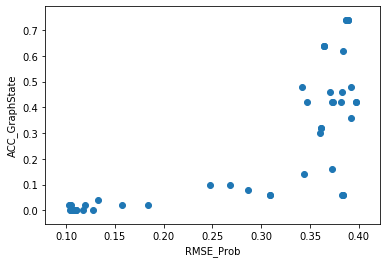

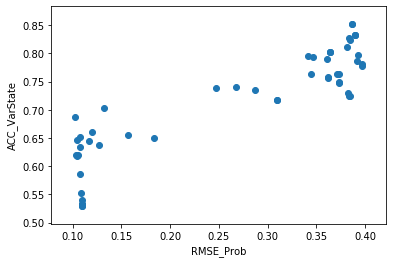

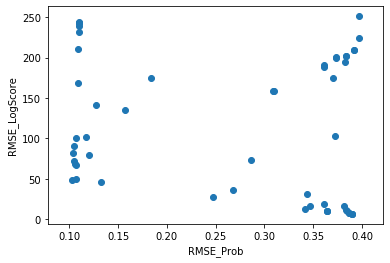

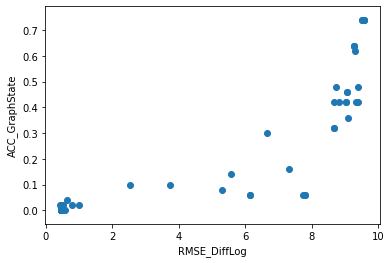

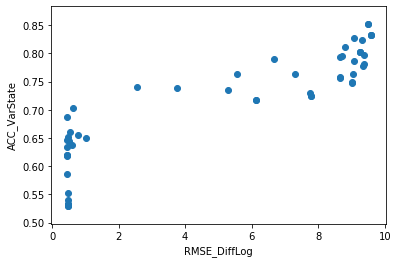

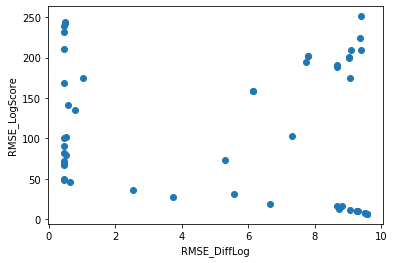

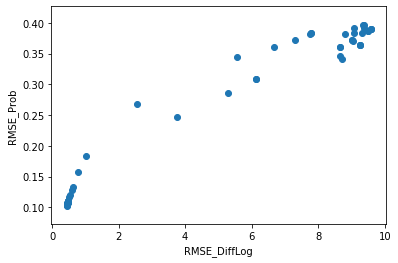


metric-loss-correlations
(5, 2)


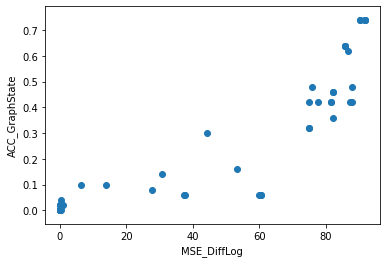

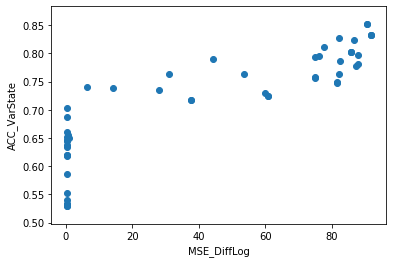

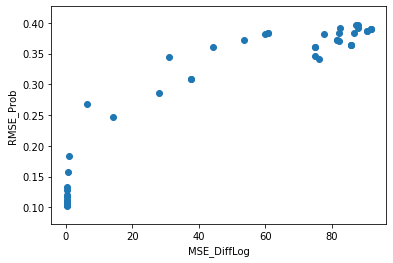

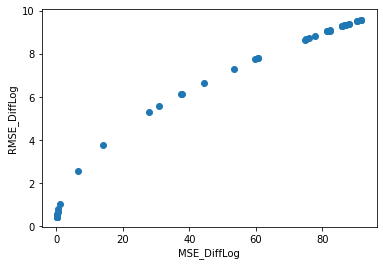

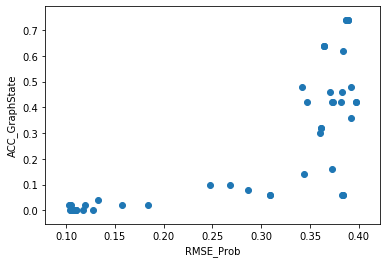

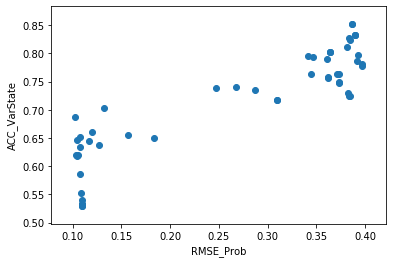

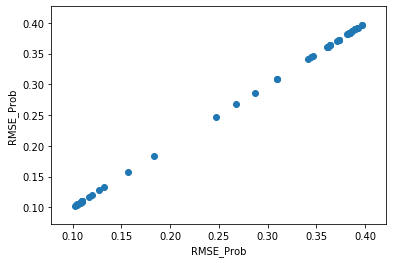

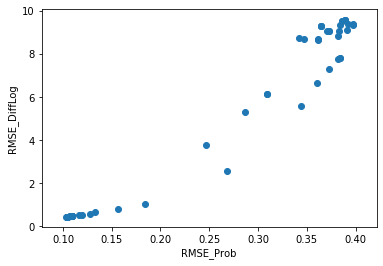

metric-correlations
(5, 5)


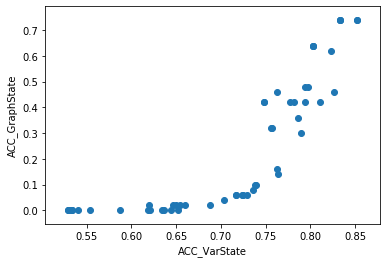

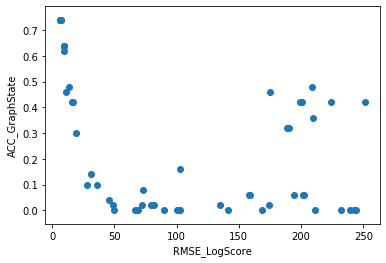

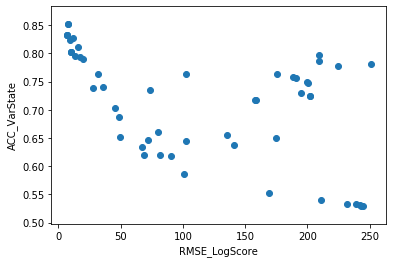

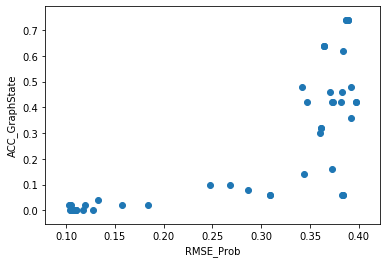

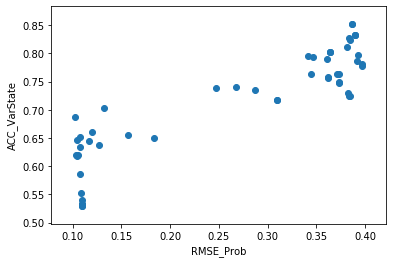

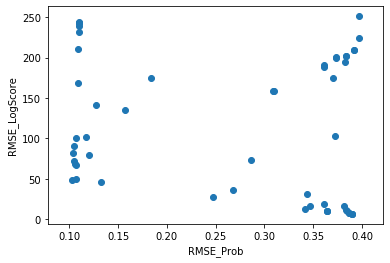

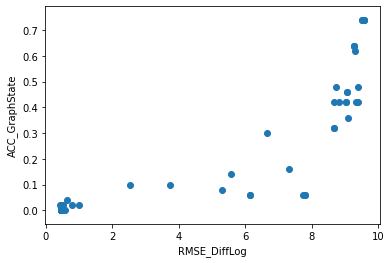

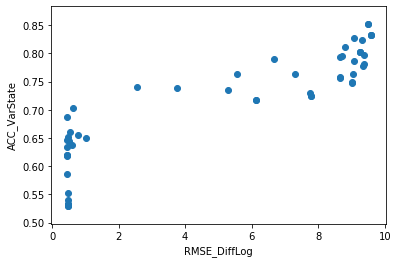

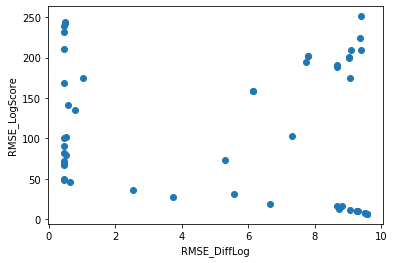

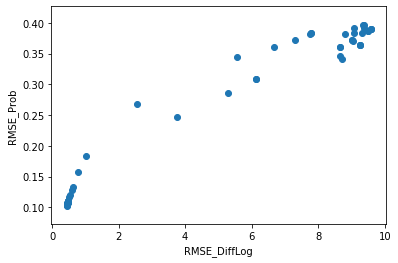


metric-loss-correlations
(5, 2)


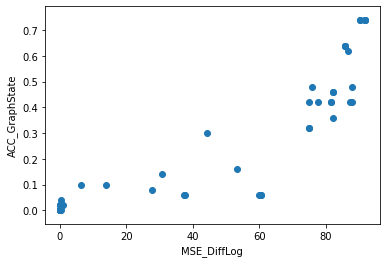

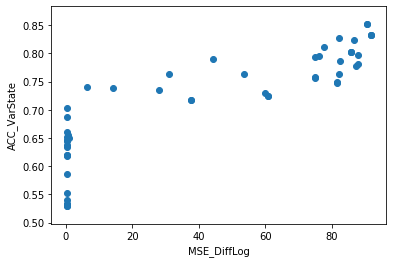

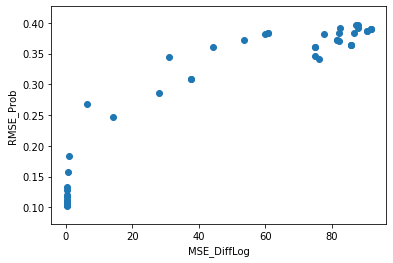

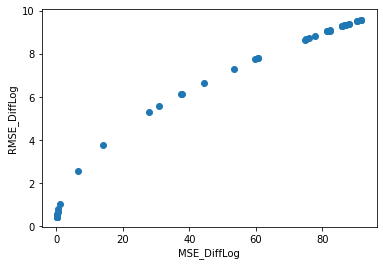

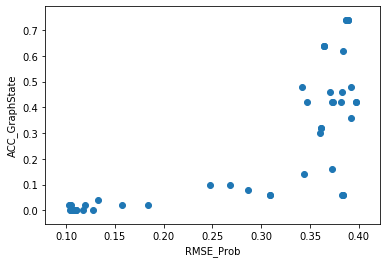

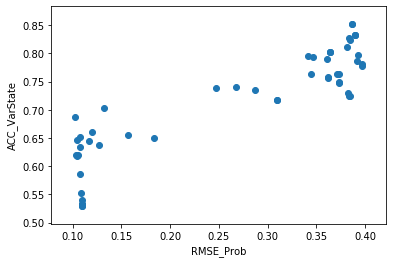

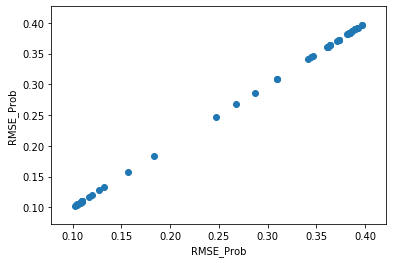

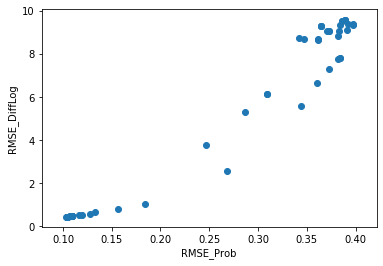

In [25]:
cur_data = data.loc[
    (data['UPDATES']=='PARALL') &
    data['ATTRACTIVE_FIELD'] 
]
values = {
    idx: preprocess(cur_data[idx].values)
    for idx in cur_data.columns
}
values['MSE_DiffLog_training'] = values['RMSE_DiffLog_training']**2
values['MSE_DiffLog_val'] = values['RMSE_DiffLog_val']**2
metric_names = [
    'ACC_GraphState', 'ACC_VarState',
    'RMSE_LogScore', 
    'RMSE_Prob', 
    'RMSE_DiffLog', 
]
loss_names = [
    'MSE_DiffLog', 'RMSE_Prob',
]
METRIC_PLOT_NUM = 10
METRIC_LOSS_PLOT_NUM = 4

analyze_metrics(values, metric_names, loss_names, METRIC_PLOT_NUM, METRIC_LOSS_PLOT_NUM, suffix='_training')
analyze_metrics(values, metric_names, loss_names, METRIC_PLOT_NUM, METRIC_LOSS_PLOT_NUM, suffix='_val')

metric-correlations
(5, 5)


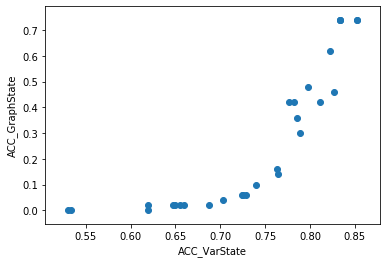

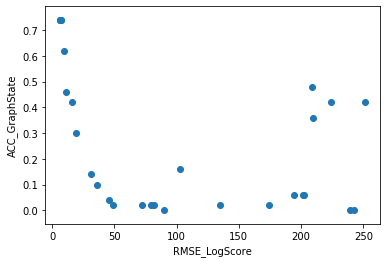

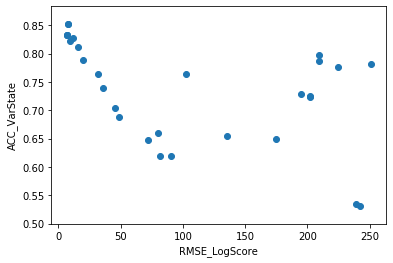

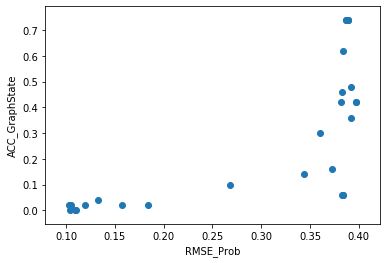

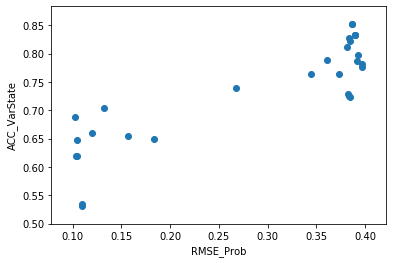

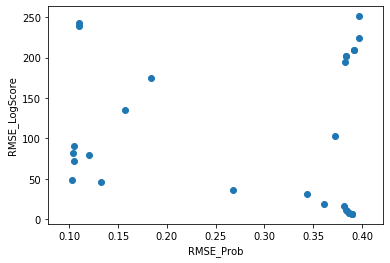

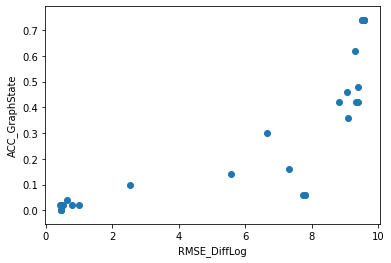

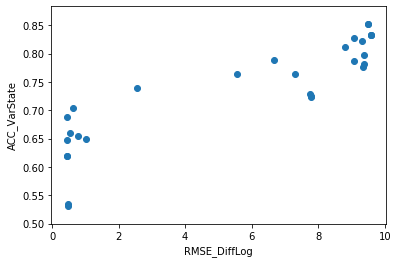

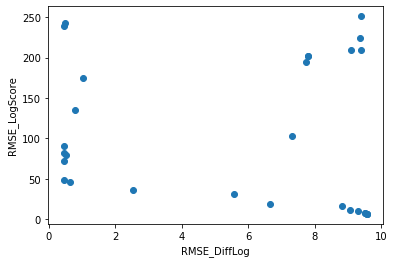

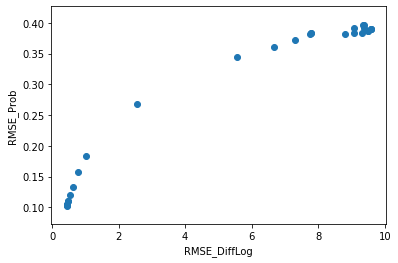


metric-loss-correlations
(5, 2)


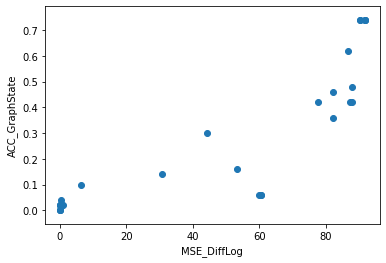

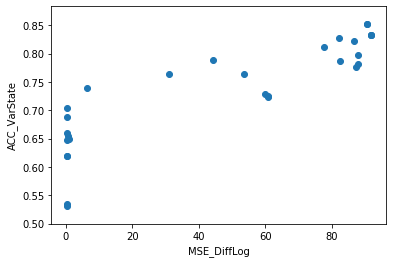

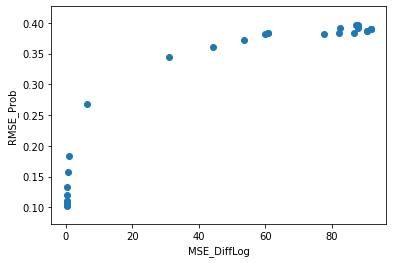

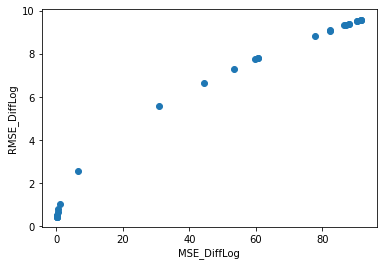

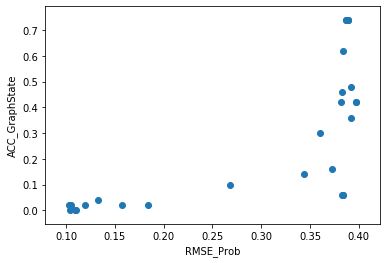

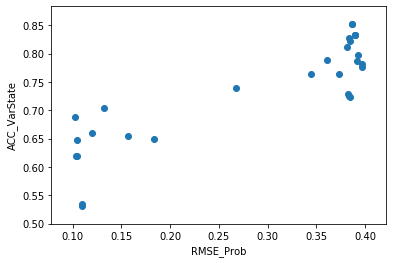

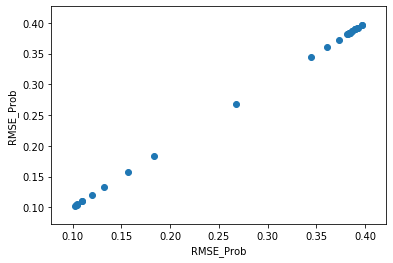

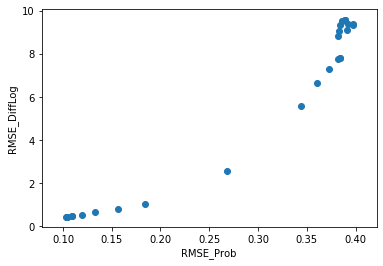

metric-correlations
(5, 5)


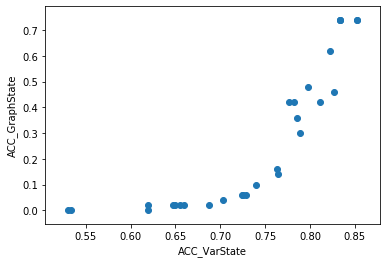

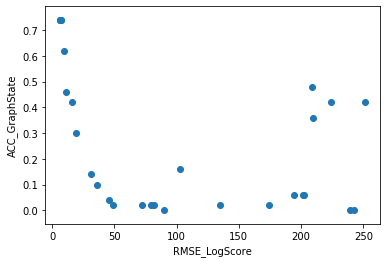

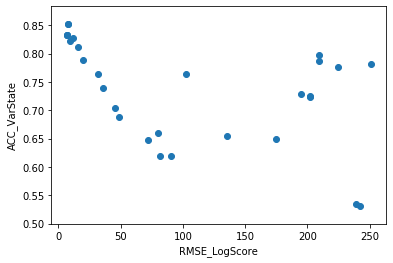

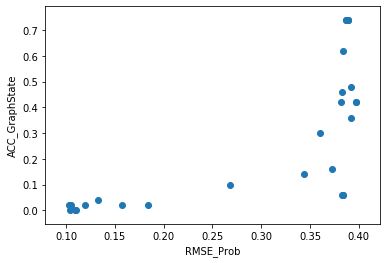

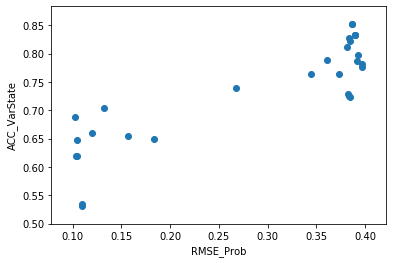

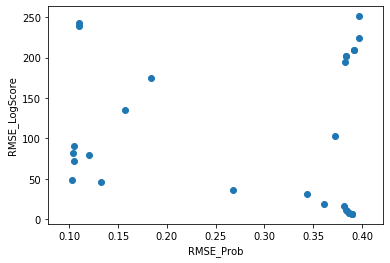

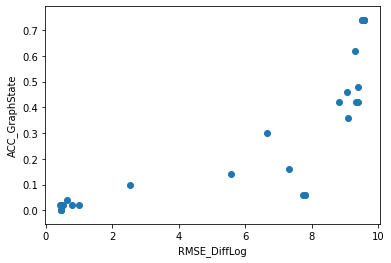

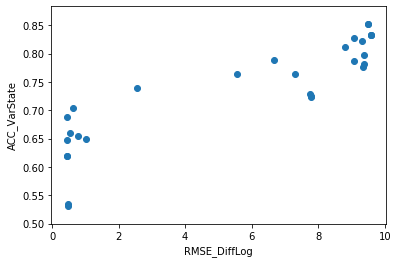

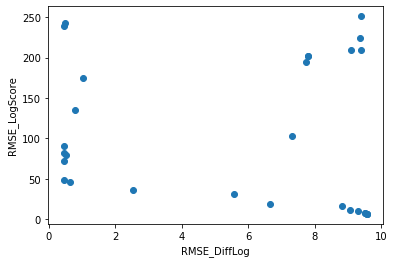

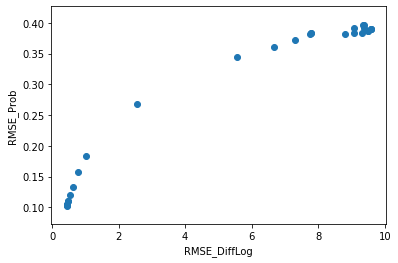


metric-loss-correlations
(5, 2)


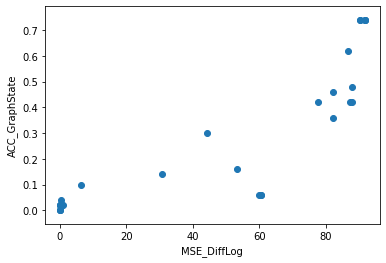

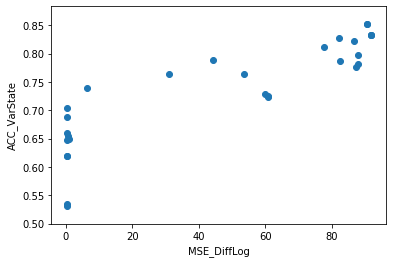

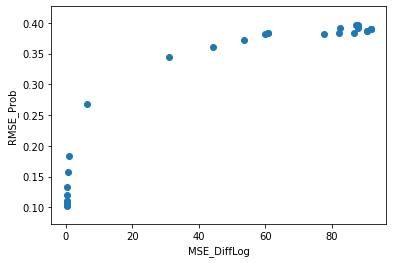

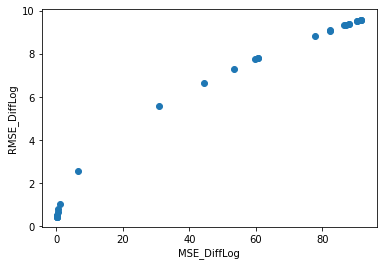

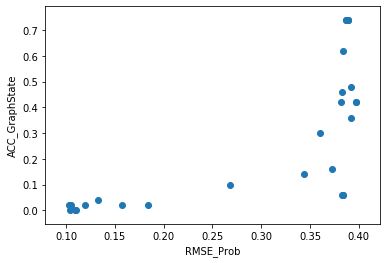

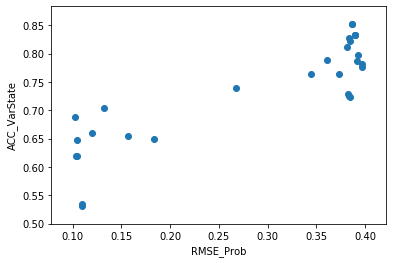

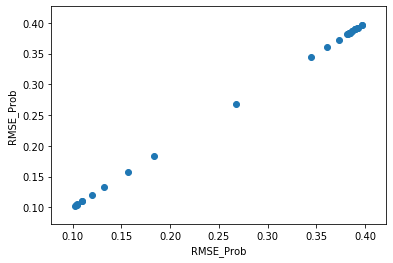

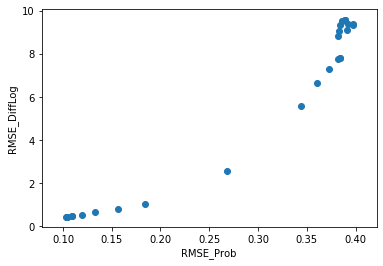

In [26]:
cur_data = data.loc[
    (data['UPDATES']=='PARALL') &
    data['ATTRACTIVE_FIELD'] &
    (data['MODEL_MAP_FLAG'])
]
values = {
    idx: preprocess(cur_data[idx].values)
    for idx in cur_data.columns
}
values['MSE_DiffLog_training'] = values['RMSE_DiffLog_training']**2
values['MSE_DiffLog_val'] = values['RMSE_DiffLog_val']**2
metric_names = [
    'ACC_GraphState', 'ACC_VarState',
    'RMSE_LogScore', 
    'RMSE_Prob', 
    'RMSE_DiffLog', 
]
loss_names = [
    'MSE_DiffLog', 'RMSE_Prob',
]
METRIC_PLOT_NUM = 10
METRIC_LOSS_PLOT_NUM = 4

analyze_metrics(values, metric_names, loss_names, METRIC_PLOT_NUM, METRIC_LOSS_PLOT_NUM, suffix='_training')
analyze_metrics(values, metric_names, loss_names, METRIC_PLOT_NUM, METRIC_LOSS_PLOT_NUM, suffix='_val')